In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [3]:
data=pd.read_csv(r"C:\Users\Stuthi S\OneDrive\Desktop\python\projects\diabetespred\diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


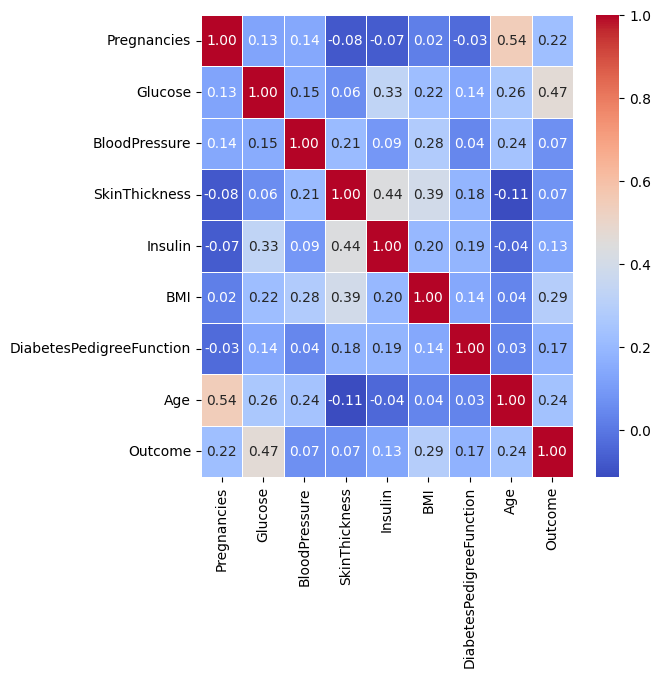

In [17]:
corr=data.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr,fmt="0.2f",linewidth=0.5,annot=True,cmap="coolwarm")
plt.show()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [22]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [153]:
X=data.drop(columns=['Outcome',"Pregnancies","BloodPressure"],axis=1)
y=data["Outcome"]

In [154]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [155]:
X.head()

,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,35,0,33.6,0.627,50
1,85,29,0,26.6,0.351,31
2,183,0,0,23.3,0.672,32
3,89,23,94,28.1,0.167,21
4,137,35,168,43.1,2.288,33


In [156]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [157]:
from sklearn.naive_bayes import GaussianNB

In [158]:
nb=GaussianNB()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

nb.fit(X_train,y_train)
pred2=nb.predict(X_test)
print(accuracy_score(pred2,y_test))

0.7532467532467533


In [160]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [162]:
X=data.drop(columns=['Outcome'],axis=1)
y=data["Outcome"]

In [163]:
scaler.fit(X)

StandardScaler()

In [164]:
stand=scaler.transform(X)

In [169]:
X=stand
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

nb.fit(X_train,y_train)
pred2=nb.predict(X_test)
print(accuracy_score(pred2,y_test))

0.7445887445887446


In [174]:
inp=(4,110,92,0,0,37.6,0.191,30)
inp=np.asarray(inp).reshape(1,-1)

In [175]:
stander=scaler.transform(inp)

C:\Users\Stuthi S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [177]:
pred2=nb.predict(stander)
print(pred2)


[0]


In [179]:
import pickle
with open("naive_bayes_model.pkl", "wb") as file:
    pickle.dump(nb, file)
